## Preprocessing

In [130]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import os

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [131]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

# Drop the 'ASK_AMT' column
application_df = application_df.drop(columns=['ASK_AMT'])

# Display the first few rows of the dataframe to confirm the drop
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1


In [132]:
# Determine the number of unique values in each column.
unique_values = application_df.nunique()

# Display the unique values for each column
print(unique_values)

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
STATUS                     2
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
IS_SUCCESSFUL              2
dtype: int64


In [133]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
print(application_type_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [134]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff = 528
application_types_to_replace = application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = application_types_to_replace[application_types_to_replace < cutoff].index.tolist()


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")
     

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [135]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df['CLASSIFICATION'].value_counts()
print(classification_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [136]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts_more_than_one = classification_counts[classification_counts > 1]
print(classification_counts_more_than_one)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [137]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff = 1883 
classifications_to_replace = classification_counts[classification_counts < cutoff].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [138]:

application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1


In [139]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_dummies = pd.get_dummies(application_df)
# Convert Boolean columns to integers (1 and 0)
application_df_dummies = application_df_dummies * 1

# Display the first few rows of the new DataFrame to verify the conversio
application_df_dummies.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [140]:
# Split our preprocessed data into our features and target arrays
y = application_df_dummies['IS_SUCCESSFUL'].values
X = application_df_dummies.drop(['IS_SUCCESSFUL'], axis=1).values

# Display the shapes to confirm the sizes
print("Shape of Features:", X.shape)
print("Shape of Target:", y.shape)


Shape of Features: (34299, 42)
Shape of Target: (34299,)


In [141]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test datasets to verify the sizes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (27439, 42)
Shape of X_test: (6860, 42)
Shape of y_train: (27439,)
Shape of y_test: (6860,)


In [142]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [143]:
# FIRST ATTEMPT - 72.51% accuracy
# Set the random seed
import numpy as np
import random
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 8)              │           344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 395 (1.54 KB)

 Trainable params: 395 (1.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compile, Train and Evaluate the Model

In [145]:
# Compile the model FIRST ATTEMPT
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Check the structure of the model
nn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 8)              │           344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 395 (1.54 KB)

 Trainable params: 395 (1.54 KB)

 Non-trainable params: 0 (0.00 B)

In [146]:
# train the model
history = nn.fit(
    X_train_scaled, 
    y_train, 
    epochs=100,  # Number of epochs
    batch_size=32,  # Size of the batches of data (adjust based on your data size)
    validation_split=0.2,  # Optionally, can specify the fraction of training data to use as validation
    verbose=1  # Show training log
)

Epoch 1/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step - accuracy: 0.6065 - loss: 0.6592 - val_accuracy: 0.7128 - val_loss: 0.5762
Epoch 2/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.7020 - loss: 0.5832 - val_accuracy: 0.7391 - val_loss: 0.5608
Epoch 3/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.7244 - loss: 0.5722 - val_accuracy: 0.7387 - val_loss: 0.5559
Epoch 4/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.7250 - loss: 0.5674 - val_accuracy: 0.7380 - val_loss: 0.5541
Epoch 5/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.7254 - loss: 0.5647 - val_accuracy: 0.7389 - val_loss: 0.5527
Epoch 6/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.7253 - loss: 0.5625 - val_accuracy: 0.7392 - val_loss: 0.5512
Epoch 7/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.7242 - loss: 0.5605 - val_accuracy: 0.7382 - val_loss: 0.5501
Epoch 8/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.7248 - loss: 0

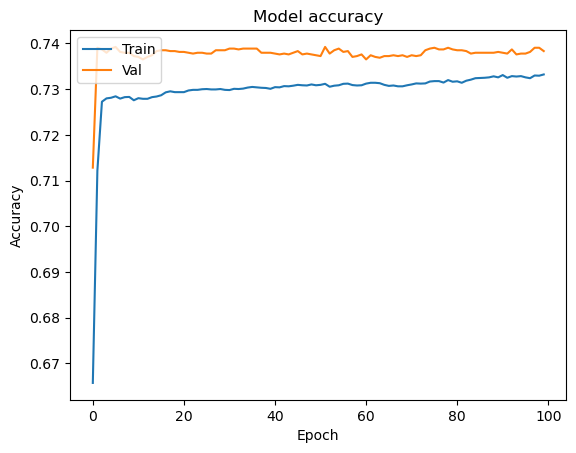

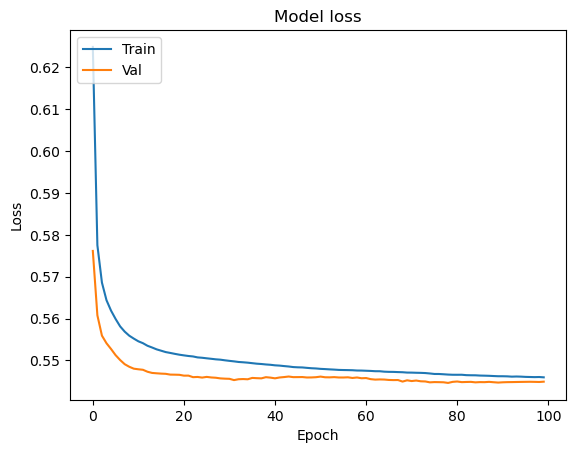

In [147]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [148]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - 240us/step - accuracy: 0.7251 - loss: 0.5584
Loss: 0.5584256649017334, Accuracy: 0.7250728607177734


Attempt 1 Results 

** Accuracy:

The accuracy is slightly higher than the version with the log-transformed ASK_AMT (72.45%) but slightly lower than the earlier version without ASK_AMT (72.65%).
This indicates that dropping ASK_AMT simplifies the model without causing significant performance degradation.

** Loss:

The loss remains consistent (0.5584 vs. 0.5560 previously), indicating stable predictions.
Impact of Dropping ASK_AMT:

Removing ASK_AMT doesn’t negatively impact performance, supporting the decision to exclude it from the feature set.

In [150]:
# Export our model to HDF5 file
nn.save("H5/AlphabetSoupCharity_Attempt_1.h5")

print("Model saved successfully!")

Model saved successfully!
